<a href="https://colab.research.google.com/github/insight2action/OSU-DataMining/blob/main/1a_Exploratory_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CSE 5243:  Spring 2020

# Exploratory Data Analysis: Statistics and Data Visualization

updated by J. Van Hulse, January 2020

References:
* *Introduction to Data Mining* by Tan, Steinbach, Karpatne, Kumar, 2nd edition
* *Python Data Science Handbook* by VanderPlas

Seaborn: seaborn.pydata.org

Matplotlib: matplotlib.org
***

One of the key steps in the Data Mining process is to develop an understanding of your data by performing **Exploratory Data Analysis**, or EDA. This notebook provides an overview of Statistics and Data Visualization, two important tools to performing EDA. 

EDA also helps inform the analyst regarding the selection of preprocessing or modeling techniques. 

In [1]:
import numpy as np
import pandas as pd

#matplotlib and seaborn as used for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## The Iris Dataset

The *Iris* dataset is a classic, simple dataset that we will use to demonstrate some of the basic concepts of Exploratory Data Analysis. The dataset has four continuous, independent variables and a single categorical dependent variable. The independent variables represent different measurements: the lengths and widths of the petals and sepals. The dependent variable is the type of iris.   

In [2]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, 
                   names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Summary Statistics

**Summary statistics** are numbers that summarize properties of the data. 

The **frequency** of an attribute value is the percentage of time the value occurs in the data set 

The **mode** of an attribute is the most frequent attribute value.



In [4]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

The notions of frequency and mode are typically used with categorical data. 

For continuous attributes, the notion of a **percentile** is more useful. Given an ordinal or continuous attribute $x$ and a number $p$ between $0$ and 100, the $p^{th}$ percentile is a value $x_{[p]}$ of $x$ such that $p\%$ of the observed values of $x$ are less than $x_{[p]}$. 

For instance, the $50^{th}$ percentile is the value $x_{[50]}$ such that $50\%$ of all values of $x$ are less than $x_{[50]}$. 

In [5]:
iris.quantile(q = [0, 0.01, .1, .25, .5, .75, .9, .99, 1])

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.000,1.000,0.1
0.01,4.4,2.200,1.149,0.1
0.10,4.8,2.500,1.400,0.2
0.25,5.1,2.800,1.600,0.3
0.50,5.8,3.000,4.350,1.3
0.75,6.4,3.300,5.100,1.8
0.90,6.9,3.610,5.800,2.2
0.99,7.7,4.151,6.700,2.5
1.00,7.9,4.400,6.900,2.5


### Measures of Location

$\mbox{The}$ **mean** is the most common measure of the location of a set of points.  Assuming that there are $m$ observations with values $x_i$: 

$$
mean(x) = \bar{x}= \frac{1}{m}\sum_{i=1}^m x_i
$$

However, the mean is very sensitive to outliers.   

Thus, the **median** (middle value, or 50th percentile) is also commonly used.

In [6]:
iris.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [7]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

### Measures of Spread: Range and Variance

The **Range** is the difference between the max (largest) and min (smallest) observations for a particular attributes.

The **variance** is the most common measure of the spread of a set of points. 

$$
variance(x) = s_x^2 = \frac{1}{m-1}\sum_{i=1}^m (x_i - \bar{x})^2
$$

The **standard deviation** is the square root of the variance:

$$
stdev(x) = s_x = \sqrt{\frac{1}{m-1}\sum_{i=1}^m (x_i - \bar{x})^2}
$$



In [8]:
iris.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [9]:
iris.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [10]:
iris.max(numeric_only = True) - iris.min(numeric_only = True)

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

One problem with all three of these measures is that they are all sensitive to outliers. Numerous other measures have been proposed:

$$
\mbox{Mean Absolute Deviation}(x) = MAD(x) = \frac{1}{m}\sum_{i=1}^m \mid x_i - \bar{x} \mid
$$

$$
\mbox{Interquartile Range}(x) = IQR(x) = x_{[75]} - x_{[25]}
$$

where $x_{[75]}$ is the $75^{th}$ percentile of $x$ and $x_{[25]}$ is the $25^{th}$ percentile.  

In [11]:
iris.mad()

sepal_length    0.687556
sepal_width     0.333093
petal_length    1.561920
petal_width     0.658933
dtype: float64

In [12]:
iris.quantile(.75) - iris.quantile(.25)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

The *describe()* function in Python is an easy way to generate a variety of univariate statistics about a particular dataset. 

In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Probability Distribution Functions

For a continuous random variable $x$, the **probability density function** is used to compute the probability that $x$ takes on a value in a range $[a,b]$:

$$
P(a \le x \le b) = \int_a^b f(x) dx
$$

$ $where $f(x)$ is the probability density function (pdf) of $x$. 

The **normal distribution** is the most well know density function:

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

where $\mu$ and $\sigma$ are the mean and standard deviations of $x$, respectively. 

The **Poisson distribution** has a single parameter $\theta$, and can be used to represent the number of people arriving (at a store or hospital) between 10 and 11am.

$$
f(x) = \frac{1}{x!} \theta^x \exp^{-\theta} 
$$

The **exponential distribution** is used to measure lengths of times between events - for example, the time between phone calls.  

$$
f(x) = \theta \exp^{-\theta x} 
$$



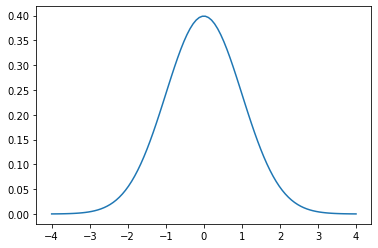

In [14]:
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

## Multivariate Statistics

So far we've considered a single attribute $x$ in isolation. However many real-world datasets have more than one attribute, $x_1, \ldots, x_n$ (in this case, $n$). 

The **joint probability density function** of $n$ attributes $X = x_1, \ldots, x_n$ can be defined as follows:

$$
P(X \in W) = \int \int_{x \in W} f(x) dx
$$

In the case of a **multivariate normal distribution**, the density function is defined by the **mean vector** ${\bf \mu}$ and **covariance matrix** $\Sigma$. 

$$
f({\bf x}) = \frac{1}{2\pi\sqrt{\mid {\bf \Sigma} \mid } }\exp{\frac{-({\bf x}-{\bf \mu})^T{\bf \Sigma^{-1}} ({\bf x}-{\bf \mu})} {2}}
$$

The below examples shows a bivariate ($n=2$) normal distribution with mean vector $(5.843, 3.054)$ and covariance matrix 

$$
{\bf \Sigma} = 
\begin{bmatrix}
    0.681& -0.039\\
    -0.039 & 0.187
  \end{bmatrix}
$$




<img src='https://drive.google.com/uc?id=1_a_2E3z_pMN1gE-_gLR3ARnzpRYh1A2B'>

### Covariance 

The **covariance** measures the relationship between independent variables and is defined as follows (assuming that there are $m$ observations):

$$
s_{j, k} = cov(x_j, x_k) = \frac{1}{m-1} \sum_{i=1}^m (x_{ij} - \bar{x}_j)(x_{ik} - \bar{x}_k)
$$

The **covariance matrix** ${\bf S}$ is an $n \times n$ matrix 

$$ 
{\bf S} = 
\begin{bmatrix}
    s_{11} & s_{12} \ldots & s_{1n}\\
    s_{21} & s_{22} \ldots & s_{2n}\\
    & \ldots &  \\
    s_{n1} & s_{n2} \ldots & s_{nn}
\end{bmatrix}
$$

Note that the diagonal entries $s_{jj}$ of ${\bf S}$ are the variances of the attribute $x_j$. 

In [15]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


### Correlation

$\mbox{The}$  **correlation** $r_{jk}$ between $x_j$ and $x_k$ is defined as:

$$
r_{jk} = \frac{s_{jk}}{\sqrt{s_{jj}s_{kk}}}
$$

Correlation normalizes the covariance by dividing the covariance by the square root of the individual variances. Therefore, the correlation ranges from -1 to +1. 

Correlation measures the linear relationship between two continuous attributes. 

In [16]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Numpy can be used to generate random data which conforms to a chosen covariance structure.  

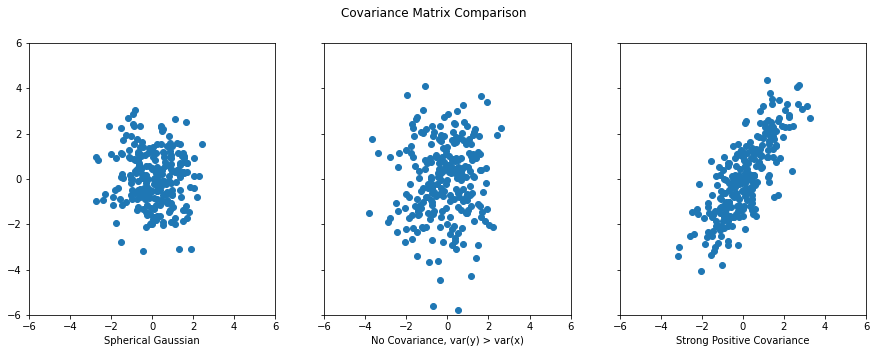

In [17]:
mean = [0, 0]
cov1 = [[1.3, 0], [0, 1.3]]  
cov2 = [[1.3, 0], [0, 3]]  
cov3 = [[1.3, 1.5], [1.5, 3]]  


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex = True, sharey=True, figsize=(15,5) )
fig.suptitle('Covariance Matrix Comparison')

x1, y1 = np.random.multivariate_normal(mean, cov1, 250).T
x2, y2 = np.random.multivariate_normal(mean, cov2, 250).T
x3, y3 = np.random.multivariate_normal(mean, cov3, 250).T

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)
ax3.scatter(x3,y3)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6,6)
ax1.set_xlabel("Spherical Gaussian")
ax2.set_xlabel("No Covariance, var(y) > var(x)")
ax3.set_xlabel("Strong Positive Covariance")

plt.show()

### Probabilistic View of Data

1) In data mining applications, datasets have a finite size. It can be useful to apply the statistical concept of a random sample from a large population.

2) More specifically, we can think of each attribute as a random variable. The mean of the attribute, calculated from the data, is the sample mean which (we hope) is a good estimate of the true mean of that attribute for the population.

3) We can also think of the dataset being used for data mining as a random sample from the population of all possible datasets. We hope that conclusions which we draw based on this sample will be applicable to any dataset sampled from the larger population.

***

# Visualization

Visualization is the conversion of data into a visual or tabular format so that the the characteristics of the data and the relationships among data items or attributes can be analyzed or reported. Visualization of data is one of the most powerful and appealing techniques for data exploration. 

* Humans have a well developed ability to analyze large amounts of information that is presented visually
* Can detect general patterns and trends
* Can detect outliers and unusual patterns   

Be careful though - it is easy to be fooled by visualizations!

Consider the following aspects of visualization:
* **Representation**: How information is mapped to a visual format. Data objects, their attributes, and the relationships among data objects are translated into graphical elements such as points, lines, shapes, and colors
* **Selection**: The elimination or the de-emphasis of certain objects and attributes
* **Arrangement**: The placement of visual elements within a display

### Histogram

The histogram shows the distribution of values for a single variable. If the variable is continuous, it is first **discretized** into disjoint bins and the bar plot shows the number (or percentage) of records in that bin. 

It can also be useful to plot an estimate of the smooth density function given the data. This technique is called *kernel density estimation* and it operates by smoothing the observations with a Gaussian kernel. 

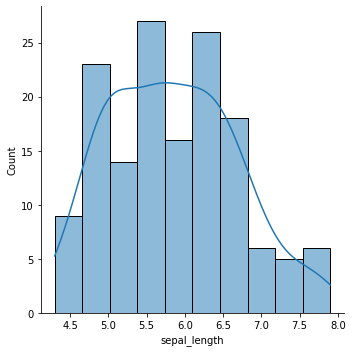

In [18]:
sns.displot(iris['sepal_length'], bins = 10, kde=True)
plt.show()

### Empirical Cumulative Distribution Function

The *empirical cumulative distribution function (ecdf)* represents the proportion or count of observations falling below each unique value for an attribute. The *ecdf* does not need smoothing or binning parameters, however in some cases certain statistical parameters (e.g., the variance or measures of central tendency) can be hard to determine. 

The `seaborn` library provides out of the box functionality to create an *ecdf* chart using the `displot` or the `ecdf` classes. 

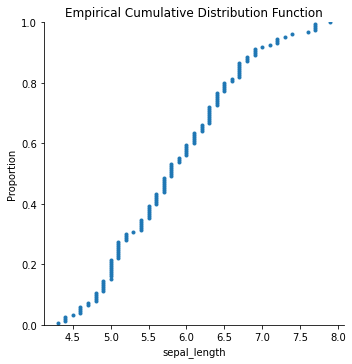

In [19]:
sns.displot(iris['sepal_length'], kind = 'ecdf', marker = '.', linestyle='none')
plt.title("Empirical Cumulative Distribution Function")
plt.show()

One of the most useful visualization is to compare the *edcf* for an attribute to the *ecdf* for the normal distribution with the same mean and standard deviation. 

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

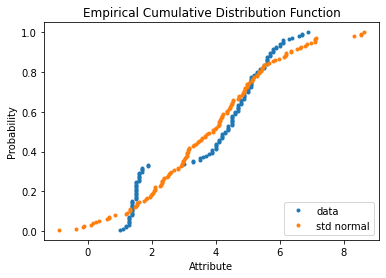

In [21]:

data = iris['petal_length']

normal_distr = np.random.normal(data.mean(), data.std(), size = len(data))

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(data)
x_nrm, y_nrm = ecdf(normal_distr)

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
plt.plot(x_nrm, y_nrm, marker = '.', linestyle = 'none')

plt.legend(('data', 'std normal'), loc='lower right')

# Label the axes
plt.xlabel("Attribute")
plt.ylabel("Probability")
plt.title("Empirical Cumulative Distribution Function")

# Display the plot
plt.show()


### Scatterplots

Scatterplots are used to visually show the relationship between attributes. 

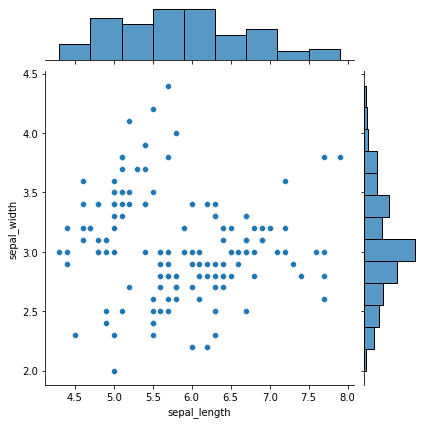

In [22]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris);

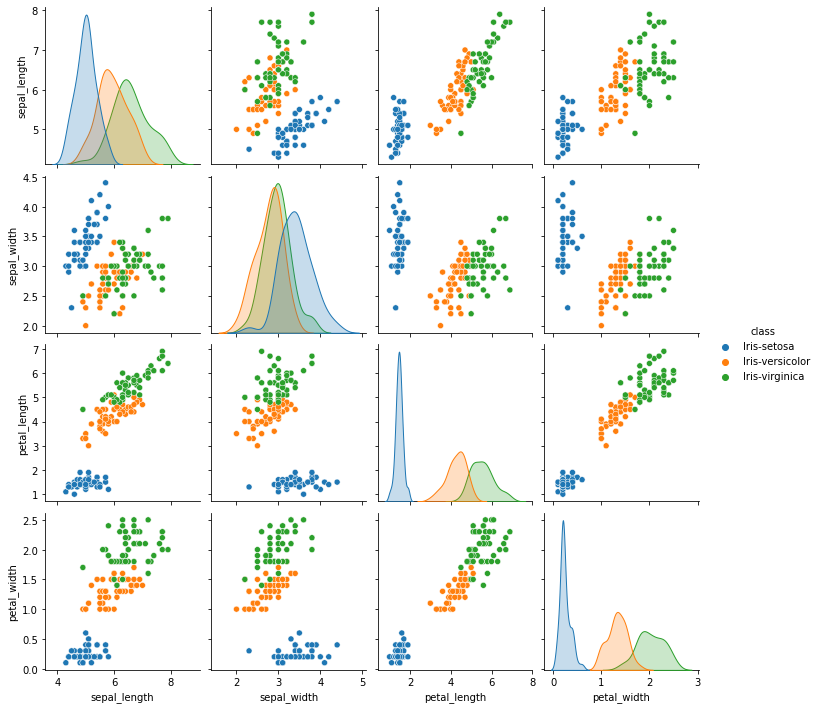

In [23]:
sns.pairplot(iris, hue = "class");

Let's compare the correlation matrix with the scatterplot visualized above.  

In [24]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Boxplots

The boxplot is useful for visually representing the distribution of a single attribute or comparing the distribution of different attributes. 

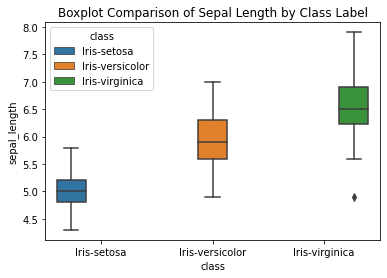

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(y=iris['sepal_length'], x = iris['class'], hue = iris['class'])
plt.title("Boxplot Comparison of Sepal Length by Class Label")
plt.show()

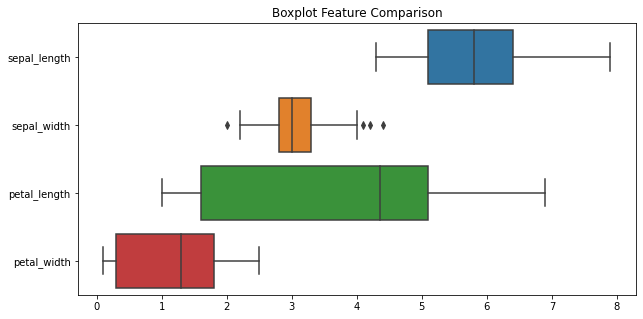

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=iris, orient="h")
plt.title("Boxplot Feature Comparison")
plt.show()

In the **boxenplot** or **letter plot**, the median is shown by a vertical line segment, and the innermost box is drawn at the lower and upper fourths, as in the conventional boxplot. An incrementally narrower box is drawn between at the lower and upper eighths, and narrower one still at the lower and upper sixteenths. We continue in this fashion until we reach a box that corresponds to a stopping rule. 

https://vita.had.co.nz/papers/letter-value-plot.pdf

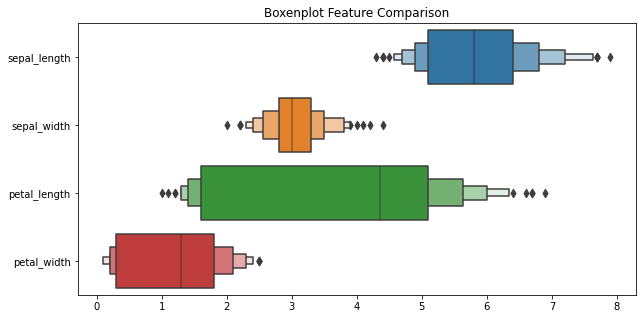

In [27]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=iris, orient="h")
plt.title("Boxenplot Feature Comparison")
plt.show()

The **violin plot** is similar to the boxplot, but it features a kernel density estimation of the underlying distribution.

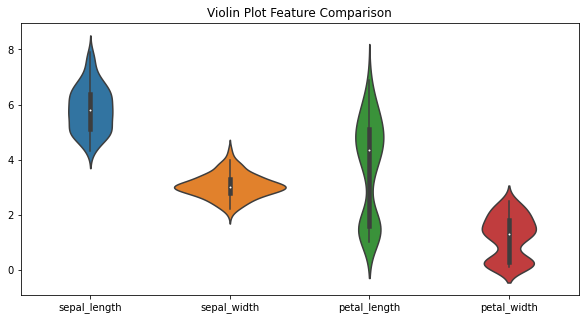

In [28]:
plt.figure(figsize=(10,5))
sns.violinplot(data=iris)
plt.title("Violin Plot Feature Comparison")
plt.show()

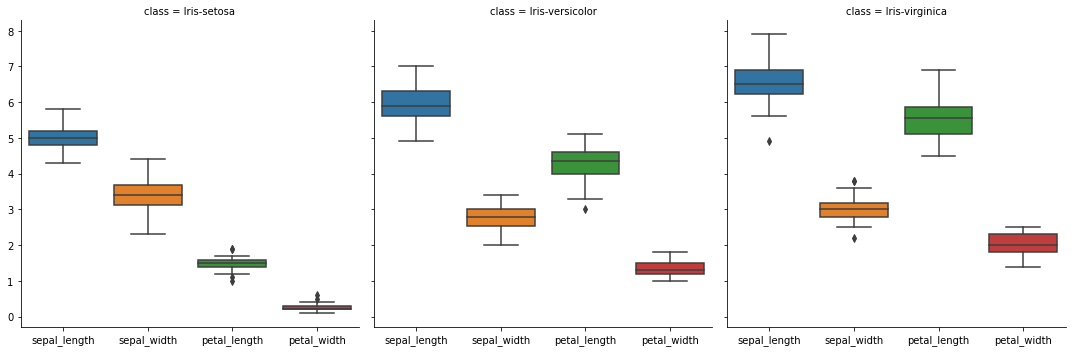

In [29]:
g = sns.catplot(data =iris, col = 'class',  kind = 'box')

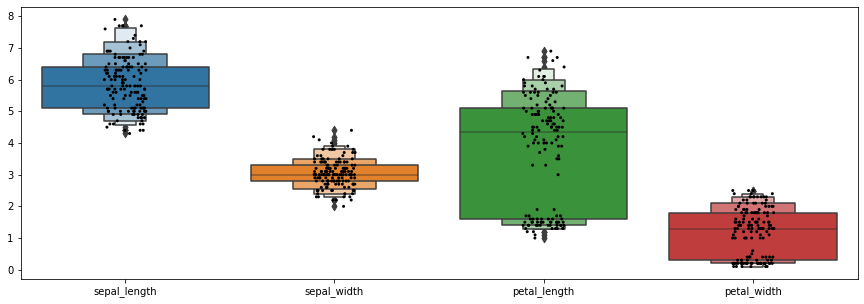

In [30]:
plt.figure(figsize=(15,5))
sns.boxenplot( data=iris)
sns.stripplot(data = iris, size=3, jitter=True, color="black")

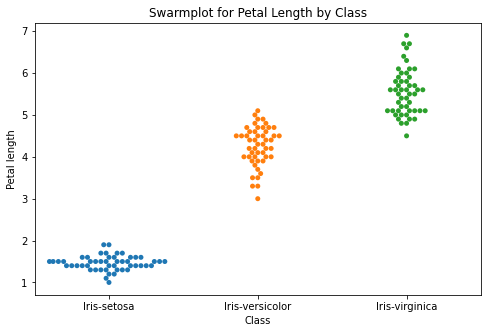

In [31]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="class", y = "petal_length", data = iris)

# Label the axes
plt.xlabel('Class')
plt.ylabel('Petal length')
plt.title("Swarmplot for Petal Length by Class")
plt.show()

## Parallel Plot

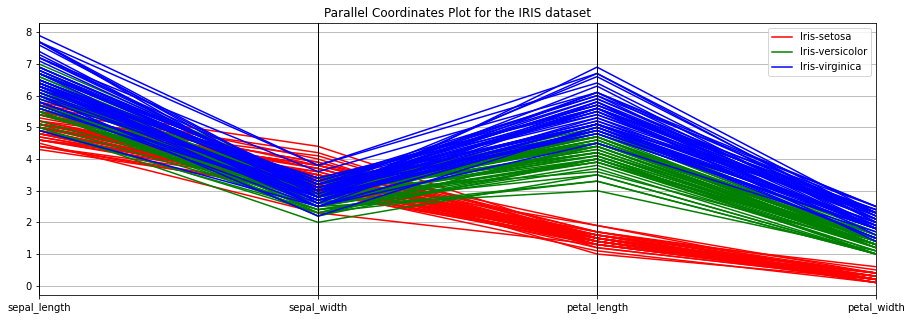

In [32]:
plt.figure(figsize=(15,5))

pd.plotting.parallel_coordinates(iris, 'class',['sepal_length','sepal_width','petal_length','petal_width'],  
                                 color=('r', 'g', 'b'))
plt.title("Parallel Coordinates Plot for the IRIS dataset")

plt.show()

## Additional Examples from the Seaborn Library

We've based our examples on the Iris dataset, which has some inherent limitations. Using the examples available at seaborn.pydata.org, here are some additional interesting visualizations. 

In this section, we'll consider preloaded datasets called `flights` and `fmri`.  These datasets can be accessed using the `load_datasets()` function. 

In [33]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


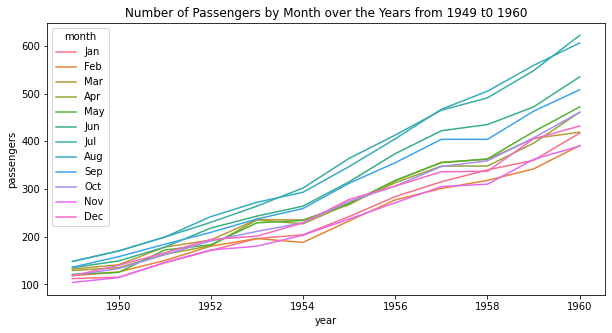

In [34]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=flights, x="year", y="passengers", hue="month")
plt.title("Number of Passengers by Month over the Years from 1949 t0 1960")
plt.show()

Here, instead of plotting each month separately, the data is aggregated by year to show the mean (solid line) and the 95% confidence interval. 

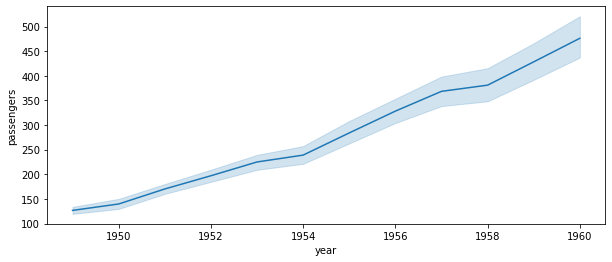

In [35]:
plt.figure(figsize=(10, 4))

sns.lineplot(data=flights, x="year", y="passengers")
plt.show()

In [36]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


We can show different lines depending on another categorical variable (in this case, the categorical 

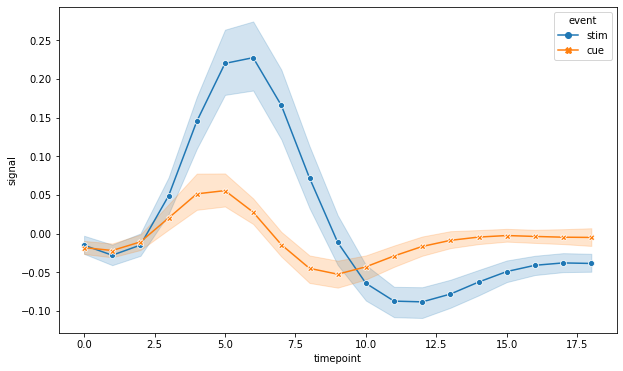

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", style="event", 
             markers = True, dashes=False)
plt.show()

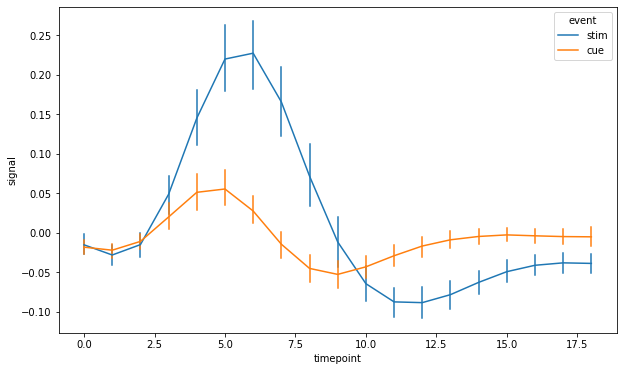

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", ci=95
)
plt.show()

The `fmri` dataset has two different categorical variables that you may want to analyze: `region` and `event`.  In other words, you may want to analyze `signal` over time, conditional on the two categorical variables `region` and `event`. You could include four lines on a single figure, however it may be easier to visualize if you have two side-by-side figures to represent one of the attributes. The `relplot()` function can provide this type of capability. 

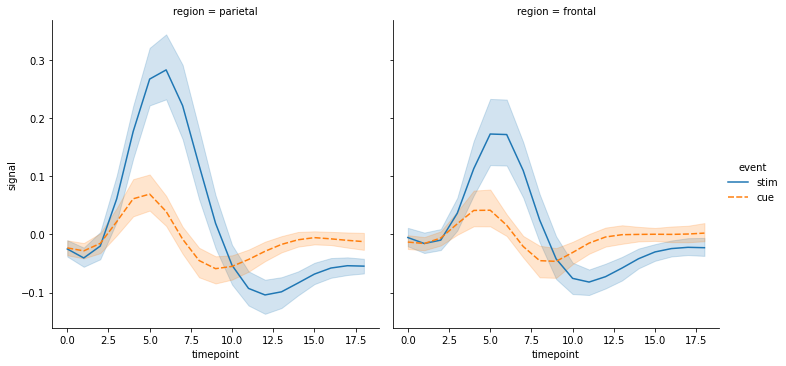

In [39]:
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    col="region", hue="event", style="event",
    kind="line"
)
plt.show()